In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
# Membaca data dari file CSV
data = pd.read_csv("Salary_dataset_1.csv")

# Membuat salinan DataFrame
data_up = data.copy()

# Menggunakan metode interpolasi untuk mengisi nilai NaN dalam kolom "Salary"
data_up['Salary'].interpolate(inplace=True)

# Menyimpan DataFrame yang telah diubah ke dalam file CSV baru
data_up.to_csv("Salary_dataset_1_updated.csv", index=False)

# Menampilkan DataFrame yang telah diubah
data_up


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,62298.5
8,8,3.3,64446.0
9,9,3.8,57190.0


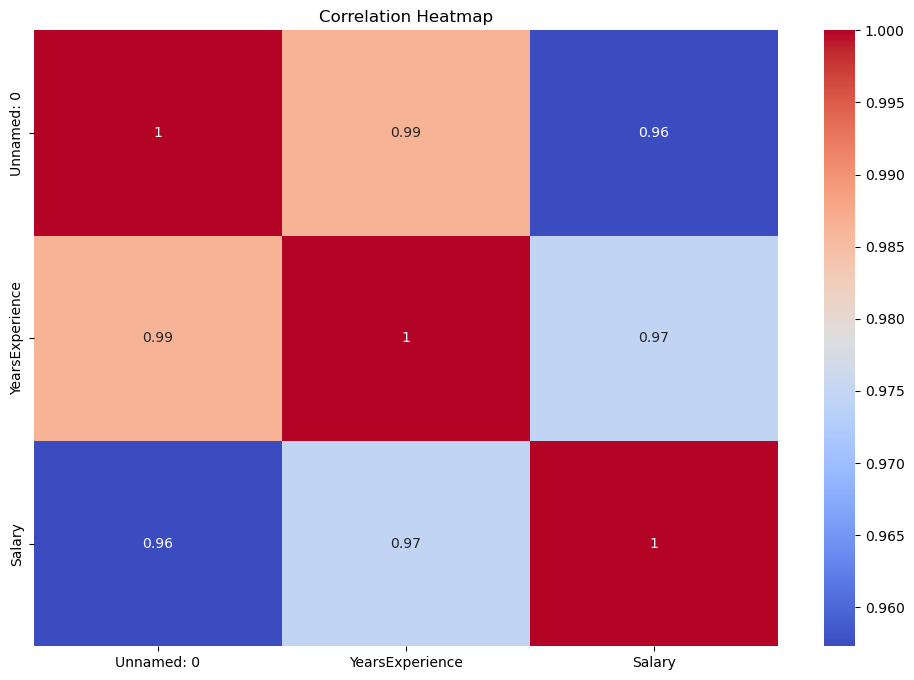

In [13]:
# Membaca dataset yang telah diubah
data_up = pd.read_csv("Salary_dataset_1_updated.csv")

# Membuat heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(data_up.corr(), annot=True, cmap="coolwarm")

# Menambahkan judul
plt.title("Correlation Heatmap")

# Menampilkan plot
plt.show()

Mean Squared Error: 50666212.087890826


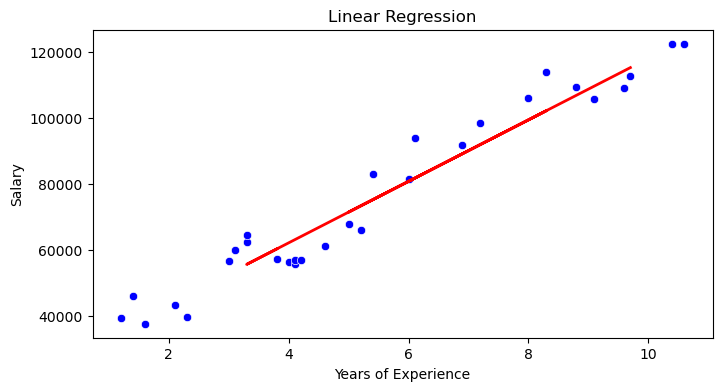

In [17]:
# Pilih kolom yang ingin digunakan untuk prediksi
X = data_up[['YearsExperience']]
y = data_up['Salary']

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Menghitung MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Membuat scatter plot dan plot regresi linear
plt.figure(figsize=(8, 4))
sns.scatterplot(x='YearsExperience', y='Salary', data=data_up, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title("Linear Regression")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()